# Turrapport
> Backcountry ski

- toc: False 
- badges: False
- comments: true
- categories: [backcountry ski]
- image: images/chart-preview.png

In [14]:
import stravaio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Image

In [15]:
#hide_input
act = client.get_activity_by_id(4559817993).to_dict()
stream = client.get_activity_streams(id=4559817993, athlete_id=10774751)#.to_dict()
stream = pd.DataFrame(stream.to_dict())
stream['latlng'] = list(zip(stream.lat.values, stream.lng.values))

In [16]:
#hide_input
display(Markdown(f"""
# {act['name']}
### {act['type']} <br>
Total Distance: {round(act['distance']/1000,1)} km <br>
Moving Time: {np.round(act['distance']/60/60, 1)} hours <br>
Elevation Gain: {int(np.round(act['total_elevation_gain'], 0))} meters
"""))


# Lammanipa, oksli og +1 drone
### BackcountrySki <br>
Total Distance: 9.0 km <br>
Moving Time: 2.5 hours <br>
Elevation Gain: 1384 meters


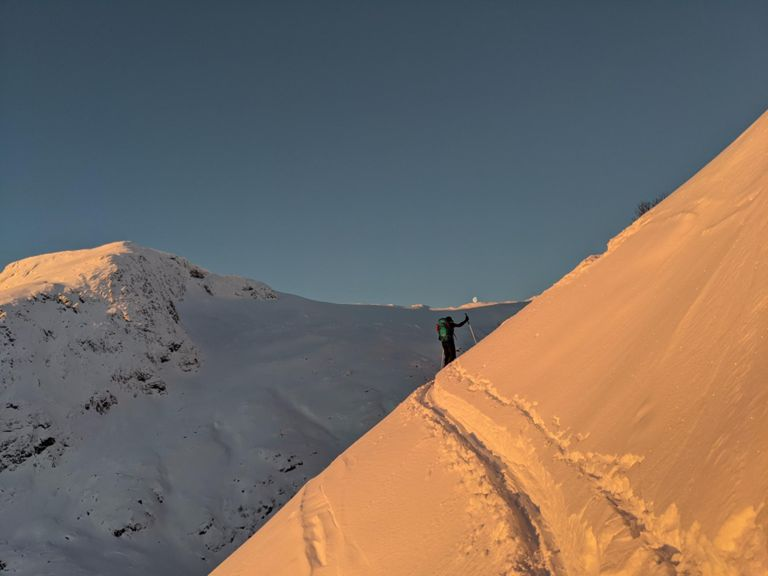

In [17]:
#hide_input
Image(act['photos']['primary']['urls']['600'])

<AxesSubplot:xlabel='time', ylabel='altitude'>

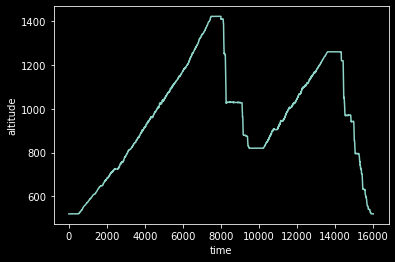

In [18]:
#hide_input
sns.lineplot(x="time",y="altitude",data=stream)

In [19]:
#hide_input
import map_utils
from importlib import reload
reload(map_utils)
map_utils.build_map(stream)